# Google Trend Data

# Basic Forecasting Techniques

In [1]:
#Importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

### Reading the dataset

In [2]:
data = pd.read_csv('C:/Customers_in_a_Shop.csv',header=None)
data

,0,1
0,1949-01,114.0
1,1949-02,120.0
2,1949-03,134.0
3,1949-04,67.0
4,1949-05,123.0
...,...,...
139,1960-08,606.0
140,1960-09,508.0
141,1960-10,720.0
142,1960-11,750.0


In [3]:
data.columns = ['Date','Customers']
data['Date'] = pd.to_datetime(data['Date'],format="%Y-%m")
data = data.set_index('Date')

#Shape of the dataset
data.shape

(144, 1)

In [4]:
data.head()

,Customers
Date,
1949-01-01,114.0
1949-02-01,120.0
1949-03-01,134.0
1949-04-01,67.0
1949-05-01,123.0


# Missing Data Handling in Time Series
### We have the following methods for treating missing values in the time series data.
1)	Mean Imputation

2)	Last Observation Carried forward

3)	Linear Interpolation

4)	Seasonal Interpolation


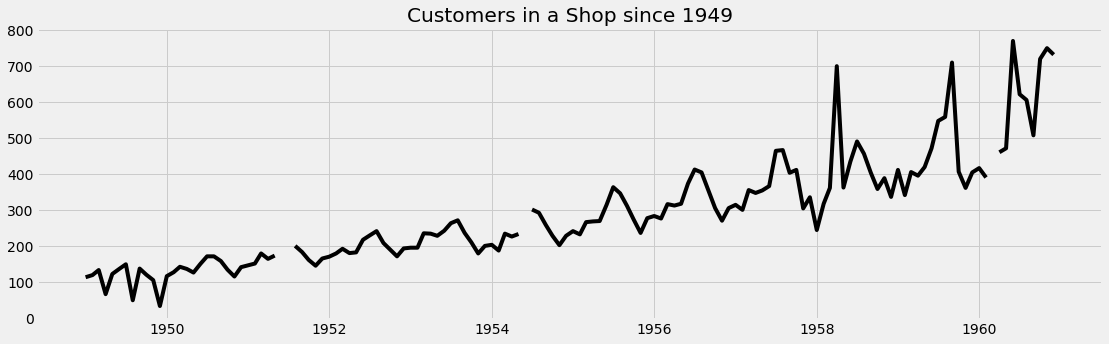

In [5]:
plt.rcParams['figure.figsize']=(17,5)

plt.plot(data,color='black')
plt.title("Customers in a Shop since 1949")
plt.show()

## Mean Imputation

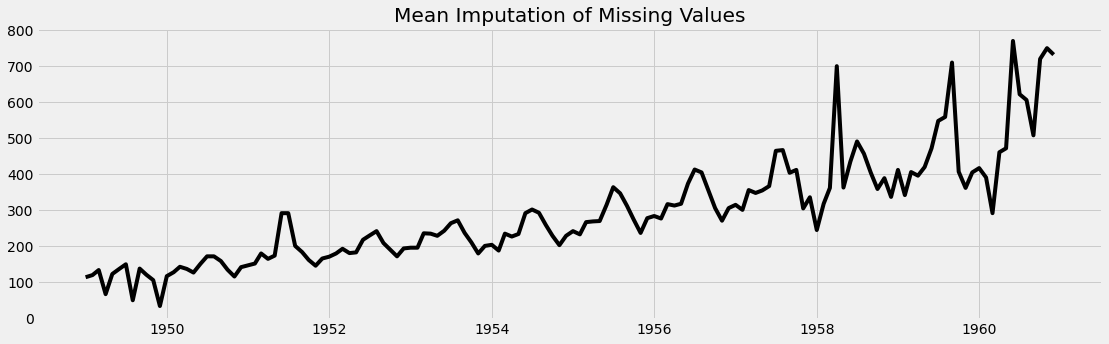

In [6]:
plt.rcParams['figure.figsize']=(17,5)
data['Customers_mean'] = data['Customers'].fillna(data['Customers'].mean())
plt.plot(data['Customers_mean'],color='black')
plt.title("Mean Imputation of Missing Values")
plt.show()

## Backward Fill Imputation

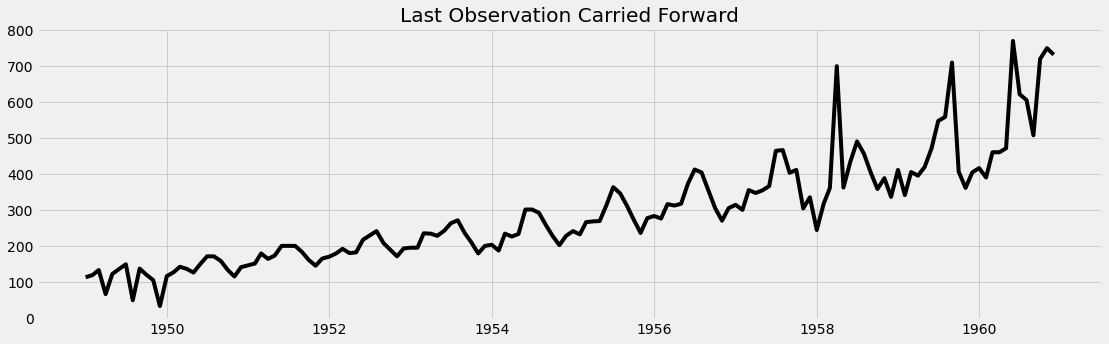

In [7]:
plt.rcParams['figure.figsize']=(17,5)

data['Customers_bfill'] = data['Customers'].bfill()

plt.plot(data['Customers_bfill'],color='black')
plt.title("Last Observation Carried Forward")
plt.show()

## Linear Interpolation

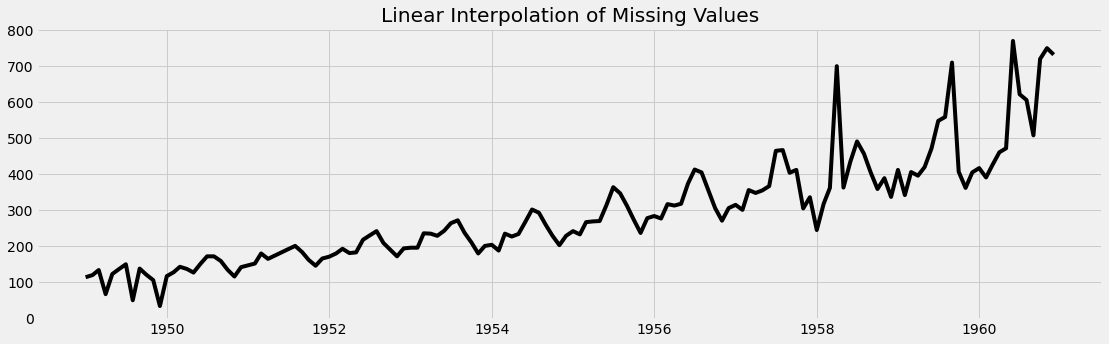

In [8]:
plt.rcParams['figure.figsize']=(17,5)

data['Customers_linear']=data['Customers'].interpolate(method='linear')

plt.plot(data['Customers_linear'],color='black')
plt.title("Linear Interpolation of Missing Values")
plt.show()

## Seasonal Interpolation

In [9]:
# lets find the dates where we have missing values
data.index[data['Customers'].isnull()]

DatetimeIndex(['1951-06-01', '1951-07-01', '1954-06-01', '1960-03-01'], dtype='datetime64[ns]', name='Date', freq=None)

In [10]:
data.tail(15)

,Customers,Customers_mean,Customers_bfill,Customers_linear
Date,,,,
1959-10-01,407.0,407.000000,407.0,407.0
1959-11-01,362.0,362.000000,362.0,362.0
1959-12-01,405.0,405.000000,405.0,405.0
1960-01-01,417.0,417.000000,417.0,417.0
1960-02-01,391.0,391.000000,391.0,391.0
1960-03-01,NaN,291.878571,461.0,426.0
1960-04-01,461.0,461.000000,461.0,461.0
1960-05-01,472.0,472.000000,472.0,472.0
1960-06-01,770.0,770.000000,770.0,770.0


In [11]:
#for example for 1960 take average seasonal of previous date
data['1949-03':'1959-03':12]

,Customers,Customers_mean,Customers_bfill,Customers_linear
Date,,,,
1949-03-01,134.0,134.0,134.0,134.0
1950-03-01,143.0,143.0,143.0,143.0
1951-03-01,180.0,180.0,180.0,180.0
1952-03-01,193.0,193.0,193.0,193.0
1953-03-01,236.0,236.0,236.0,236.0
1954-03-01,235.0,235.0,235.0,235.0
1955-03-01,267.0,267.0,267.0,267.0
1956-03-01,317.0,317.0,317.0,317.0
1957-03-01,356.0,356.0,356.0,356.0


In [12]:
data['1949-03':'1959-03':12].sum()

Customers           2829.0
Customers_mean      2829.0
Customers_bfill     2829.0
Customers_linear    2829.0
dtype: float64

In [13]:
data['1949-03':'1959-03':12].shape[0]

11

In [14]:
data['1949-03':'1959-03':12].shape[1]

4

In [15]:
data.loc['1960-03'].fillna((data['1949-03':'1959-03':12].sum())/data['1949-03':'1959-03':12].shape[0], inplace=True)
data.loc['1954-06'].fillna((data['1949-06':'1953-06':12].sum())/data['1949-06':'1953-06':12].shape[0], inplace=True)
data.loc['1951-07'].fillna((data['1949-07':'1950-07':12].sum())/data.loc['1949-07':'1950-07':12].shape[0], inplace=True)
data.loc['1951-06'].fillna((data['1949-06':'1950-06':12].sum())/data['1949-06':'1950-06':12].shape[0], inplace=True)

In [16]:
data.isnull().sum()

Customers           0
Customers_mean      0
Customers_bfill     0
Customers_linear    0
dtype: int64

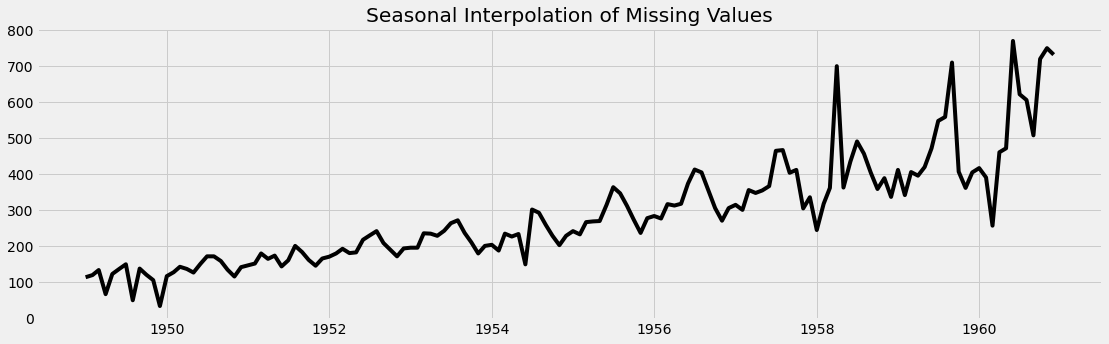

In [17]:
plt.rcParams['figure.figsize']=(17,5)
plt.plot(data['Customers'],color='black')
plt.title("Seasonal Interpolation of Missing Values")
plt.show()

## Outliers Treatment in Time Series

<AxesSubplot:xlabel='Customers_linear'>

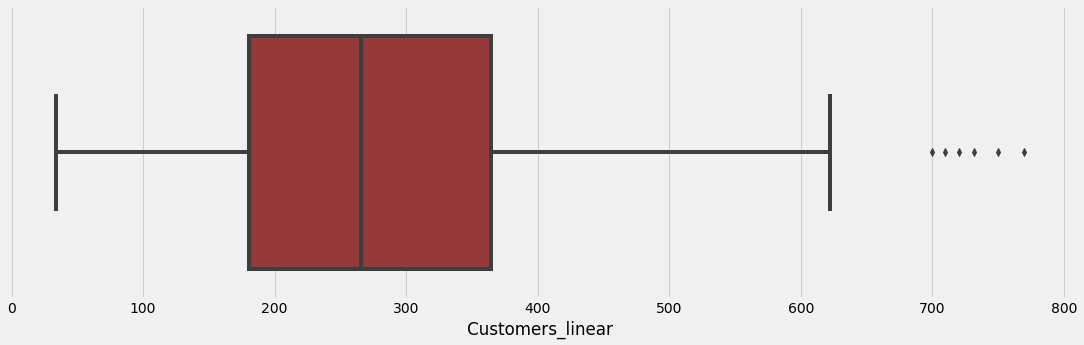

In [18]:
plt.rcParams['figure.figsize']=(17,5)
sns.boxplot(data['Customers_linear'], color='brown')

In [19]:
data['Customers_linear'].sort_values(ascending = False).head(7)

Date
1960-06-01    770.0
1960-11-01    750.0
1960-12-01    732.0
1960-10-01    720.0
1959-09-01    710.0
1958-04-01    700.0
1960-07-01    622.0
Name: Customers_linear, dtype: float64

In [20]:
# outliers treatment

data['Customers_linear'].loc[(data['Customers_linear']>=700)] = 622
# lets also check the null values again
data.isnull().sum()

Customers           0
Customers_mean      0
Customers_bfill     0
Customers_linear    0
dtype: int64

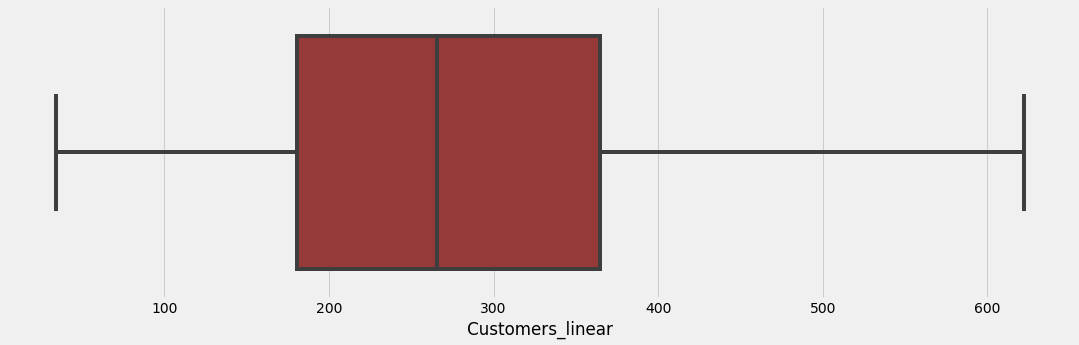

In [21]:
plt.rcParams['figure.figsize']=(17,5)
sns.boxplot(data['Customers_linear'], color='brown')
plt.show()

# Normality Analysis

<AxesSubplot:xlabel='Customers_linear', ylabel='Density'>

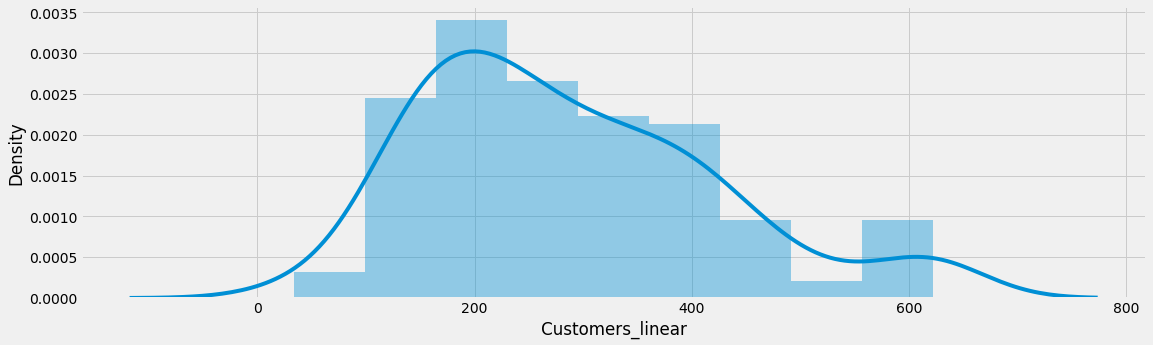

In [22]:
import seaborn as sns
sns.distplot(data['Customers_linear'])

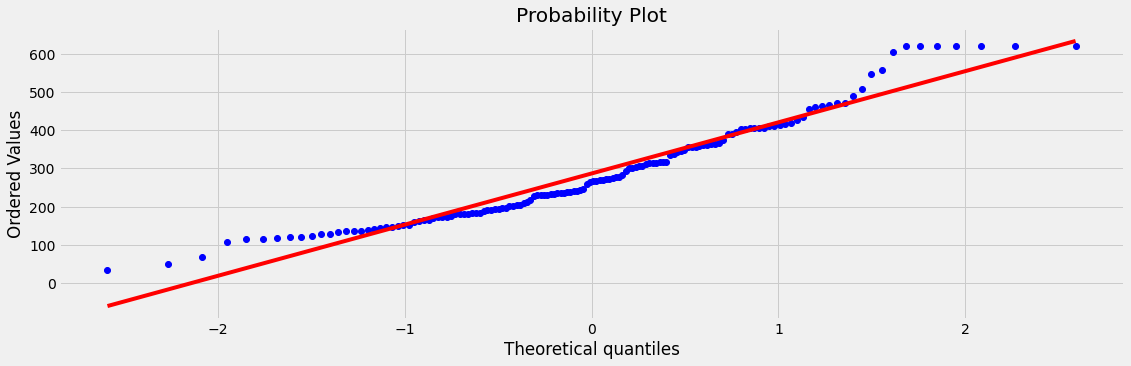

In [25]:
import scipy.stats
import pylab 
scipy.stats.probplot(data['Customers_linear'],plot=pylab)
pylab.show()

# Y-Axis: Data Value
# X-Axis: 

* for correct statistic Analysis you can use Zscore function from statsmodels 

# Naive Decomposition
### Additive Seasonal Decomposition

In [26]:
import statsmodels.api as sm

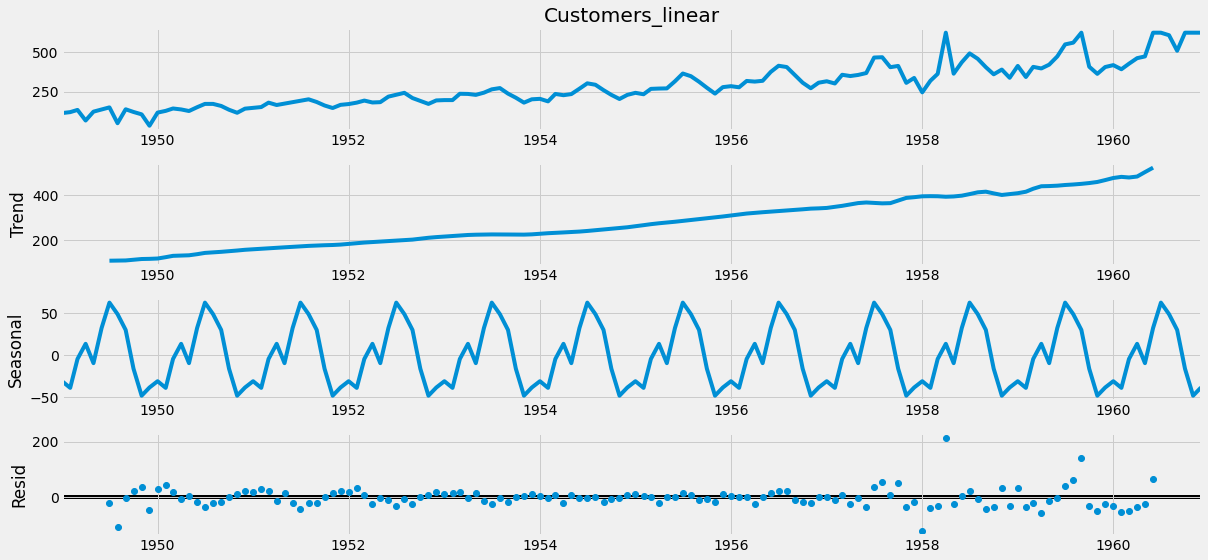

In [27]:
plt.rcParams['figure.figsize'] = (17,8)

decomposition = sm.tsa.seasonal_decompose(data['Customers_linear'], model='additive')
decomposition.plot()
                                          
plt.show()

* Be attention at Y-Scale in Seasonal! (-50,+50) from orginal data

### Multiplicative Seasonal Decomposition

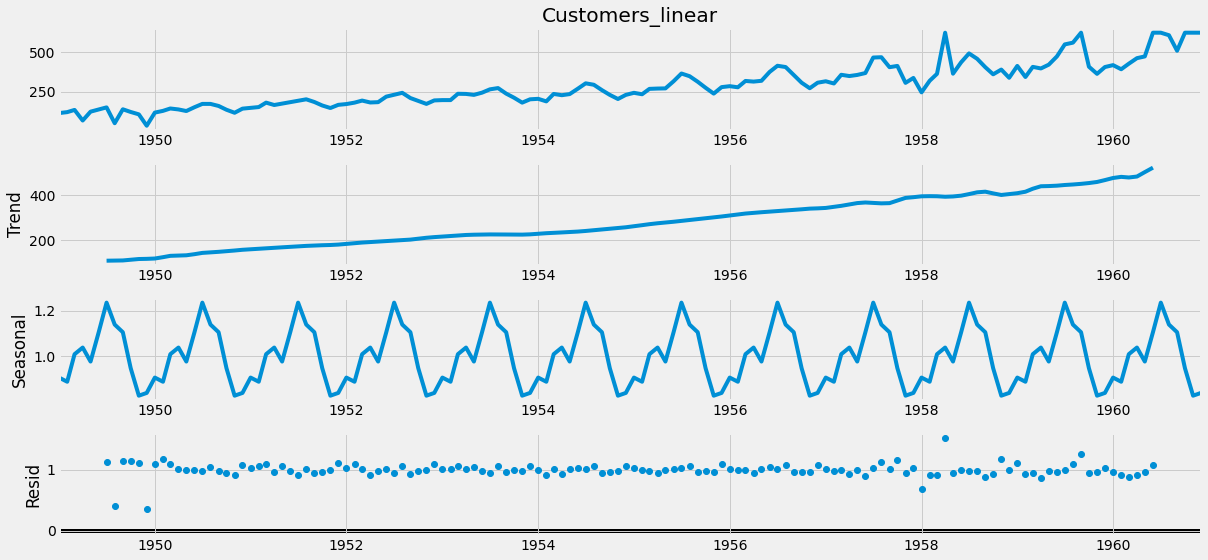

In [28]:
import statsmodels.api as sm
plt.rcParams['figure.figsize'] = (17,8)

decomposition = sm.tsa.seasonal_decompose(data['Customers_linear'], model='multiplicative')
fig = decomposition.plot()
plt.show()

## Splitting Train and Test data

In [29]:
len(data["Customers_linear"])*0.8

115.2

* We Split the data into train and test.
* First 115 rows as the train data and rest other as test data

In [30]:
data['Customers'] = data['Customers_linear']

In [31]:
length_train = 115
train = data.iloc[:length_train,:]
train

,Customers,Customers_mean,Customers_bfill,Customers_linear
Date,,,,
1949-01-01,114.0,114.0,114.0,114.0
1949-02-01,120.0,120.0,120.0,120.0
1949-03-01,134.0,134.0,134.0,134.0
1949-04-01,67.0,67.0,67.0,67.0
1949-05-01,123.0,123.0,123.0,123.0
...,...,...,...,...
1958-03-01,362.0,362.0,362.0,362.0
1958-04-01,622.0,700.0,700.0,622.0
1958-05-01,363.0,363.0,363.0,363.0


In [33]:
test=data.iloc[length_train:,: ]
test

,Customers,Customers_mean,Customers_bfill,Customers_linear
Date,,,,
1958-08-01,457.0,457.000000,457.0,457.0
1958-09-01,404.0,404.000000,404.0,404.0
1958-10-01,359.0,359.000000,359.0,359.0
1958-11-01,389.0,389.000000,389.0,389.0
1958-12-01,337.0,337.000000,337.0,337.0
1959-01-01,412.0,412.000000,412.0,412.0
1959-02-01,342.0,342.000000,342.0,342.0
1959-03-01,406.0,406.000000,406.0,406.0
1959-04-01,396.0,396.000000,396.0,396.0


In [34]:
print(train.shape)
train.tail()

(115, 4)


,Customers,Customers_mean,Customers_bfill,Customers_linear
Date,,,,
1958-03-01,362.0,362.0,362.0,362.0
1958-04-01,622.0,700.0,700.0,622.0
1958-05-01,363.0,363.0,363.0,363.0
1958-06-01,435.0,435.0,435.0,435.0
1958-07-01,491.0,491.0,491.0,491.0


In [35]:
print(train.shape)
test.head()

(115, 4)


,Customers,Customers_mean,Customers_bfill,Customers_linear
Date,,,,
1958-08-01,457.0,457.0,457.0,457.0
1958-09-01,404.0,404.0,404.0,404.0
1958-10-01,359.0,359.0,359.0,359.0
1958-11-01,389.0,389.0,389.0,389.0
1958-12-01,337.0,337.0,337.0,337.0


# Naive Method
The naive method is the simplest method of all forecasting methods. It looks at the last historical data and extrapolates it for all the future values without adjusting or attempting to establish causal factors.

In [43]:
train["Customers"][113]

435.0

In [36]:
train["Customers"][114]

491.0

In [44]:
train["Customers"][115]

IndexError: index 115 is out of bounds for axis 0 with size 115

In [41]:
y_naive = test.copy()
y_naive['forecasted_naive'] = train.Customers[length_train-1]
y_naive

,Customers,Customers_mean,Customers_bfill,Customers_linear,forecasted_naive
Date,,,,,
1958-08-01,457.0,457.000000,457.0,457.0,491.0
1958-09-01,404.0,404.000000,404.0,404.0,491.0
1958-10-01,359.0,359.000000,359.0,359.0,491.0
1958-11-01,389.0,389.000000,389.0,389.0,491.0
1958-12-01,337.0,337.000000,337.0,337.0,491.0
1959-01-01,412.0,412.000000,412.0,412.0,491.0
1959-02-01,342.0,342.000000,342.0,342.0,491.0
1959-03-01,406.0,406.000000,406.0,406.0,491.0
1959-04-01,396.0,396.000000,396.0,396.0,491.0


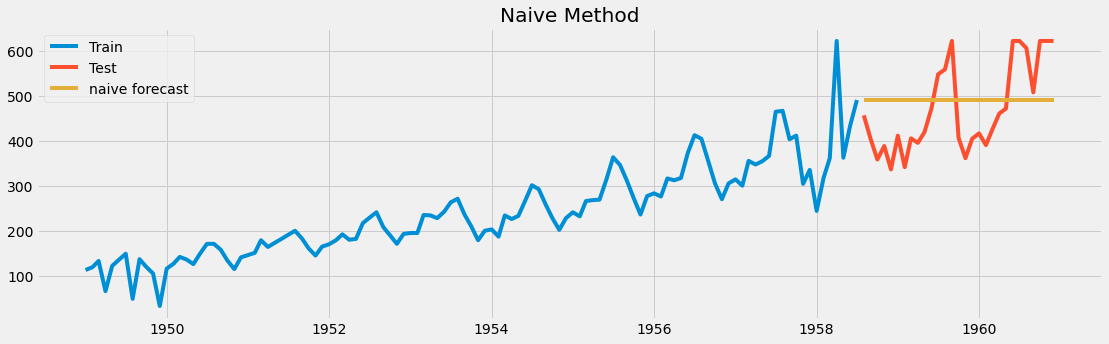

In [45]:
plt.rcParams['figure.figsize'] = (17,5)

plt.plot(train['Customers'], label = 'Train')
plt.plot(test['Customers'], label = 'Test')
plt.plot(y_naive['forecasted_naive'], label = 'naive forecast')

plt.legend()
plt.title('Naive Method')
plt.show()

# Simple Average Method
In this method, we take the future predictions equal to the average of all the historical data.

In [46]:
y_avg = test.copy()

y_avg['forecasted_avg'] = train['Customers'].mean()

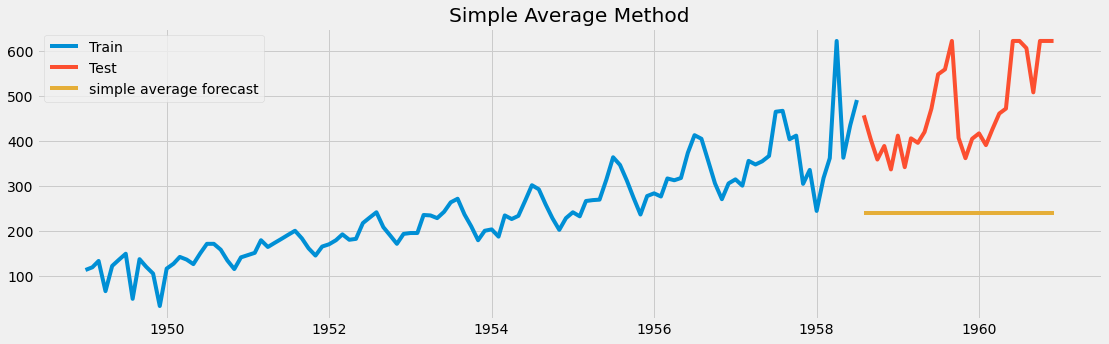

In [47]:
plt.rcParams['figure.figsize'] = (17,5)

plt.plot(train['Customers'], label = 'Train')
plt.plot(test['Customers'], label = 'Test')
plt.plot(y_avg['forecasted_avg'], label = 'simple average forecast')

plt.legend()
plt.title('Simple Average Method')
plt.show()

# Simple Moving Average Method
In this method, we take the future predictions equal to the average of a moving window. A window can be a time period of 3 months, 6 months, 9 months or 1 year.

In [48]:
y_moving = data.copy()

window = 9
y_moving["moving_average_forecast"] = data['Customers'].rolling(window).mean()
# y_moving['moving_average_forecast'][length_train:] = y_moving['moving_average_forecast'][length_train-1]

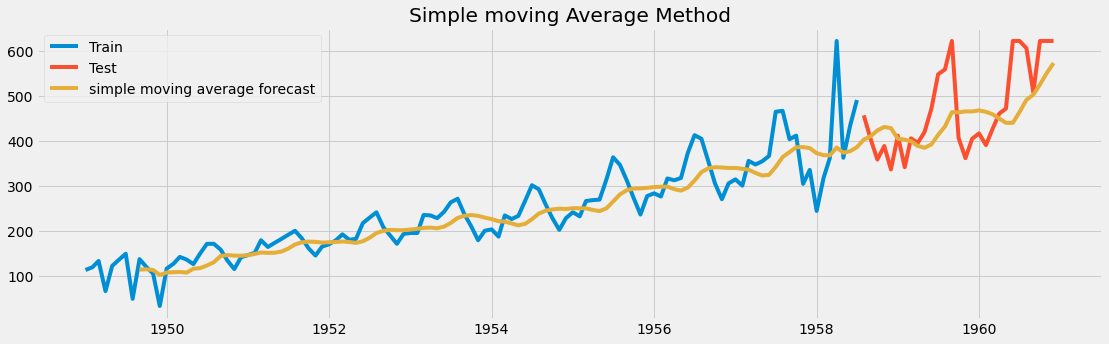

In [49]:
plt.rcParams['figure.figsize'] = (17,5)

plt.plot(train['Customers'], label = 'Train')
plt.plot(test['Customers'], label = 'Test')
plt.plot(y_moving['moving_average_forecast'], label = 'simple moving average forecast')

plt.legend()
plt.title('Simple moving Average Method')
plt.show()

* are you serious about using it for time series modeling?

# Simple Exponential Smoothing


C:\Users\amirr\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


<AxesSubplot:xlabel='Date'>

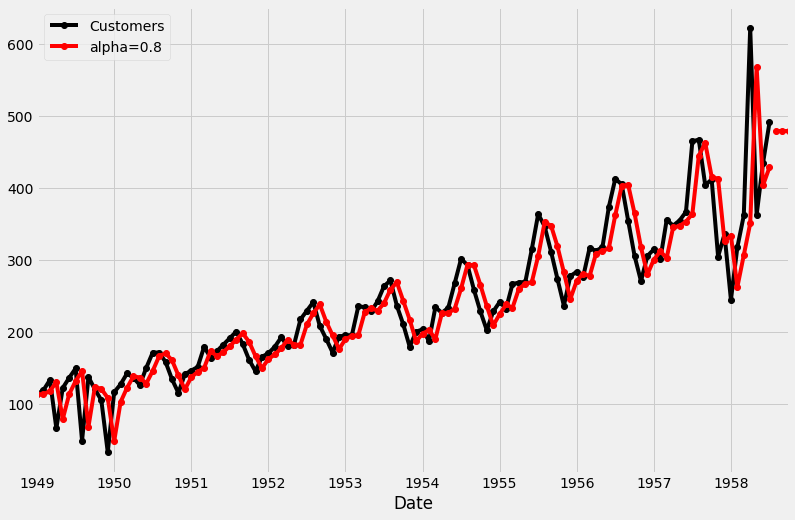

In [50]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

ins2 = SimpleExpSmoothing(train['Customers']).fit(smoothing_level=0.8,optimized=False)
ins_cast2 = ins2.forecast(3).rename('alpha=0.8')


#Plot for alpha = 0.8
ax = train['Customers'].plot(marker='o', color='black', figsize=(12,8), legend=True)
ins_cast2.plot(marker='o', ax=ax, color='red', legend=True)
ins2.fittedvalues.plot(marker='o', ax=ax, color='red')

C:\Users\amirr\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\amirr\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\amirr\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


<AxesSubplot:xlabel='Date'>

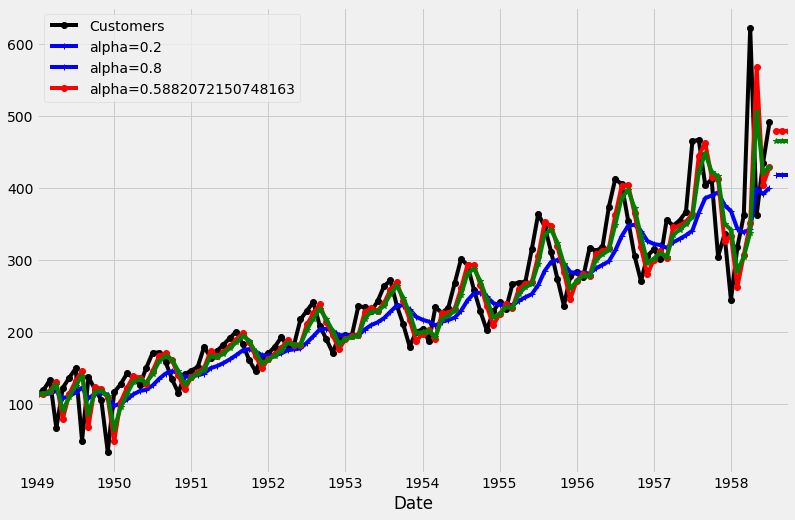

In [51]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

#First Instance
ins1 = SimpleExpSmoothing(train['Customers']).fit(smoothing_level=0.2,optimized=False)
ins_cast1 = ins1.forecast(3).rename('alpha=0.2')

#Second Instance
ins2 = SimpleExpSmoothing(train['Customers']).fit(smoothing_level=0.8,optimized=False)
ins_cast2 = ins2.forecast(3).rename('alpha=0.8')

#Third Instance
ins3 = SimpleExpSmoothing(train['Customers']).fit()
ins_cast3 = ins3.forecast(3).rename('alpha=%s'%ins3.model.params['smoothing_level'])


#After creating model we will visualize the plot
ax = train['Customers'].plot(marker='o', color='black', figsize=(12,8), legend=True)


#Plot for alpha =0.2
ins_cast1.plot(marker='+', ax=ax, color='blue', legend=[True])
ins1.fittedvalues.plot(marker='+', ax=ax, color='blue')

#Plot for alpha = 0.8
ins_cast2.plot(marker='o', ax=ax, color='red', legend=True)
ins2.fittedvalues.plot(marker='o', ax=ax, color='red')

#Plot for alpha=Optimized by statsmodel
ins_cast3.plot(marker='*', ax=ax, color='green', legend=True)
ins3.fittedvalues.plot(marker='*', ax=ax, color='green')

In [52]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

model = SimpleExpSmoothing(train['Customers'])
model_fit = model.fit(smoothing_level=1)
# model_fit.params

C:\Users\amirr\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [53]:
y_exp = test.copy()
y_exp['Exponential_forecast'] = model_fit.forecast(24)
y_exp

,Customers,Customers_mean,Customers_bfill,Customers_linear,Exponential_forecast
Date,,,,,
1958-08-01,457.0,457.000000,457.0,457.0,491.0
1958-09-01,404.0,404.000000,404.0,404.0,491.0
1958-10-01,359.0,359.000000,359.0,359.0,491.0
1958-11-01,389.0,389.000000,389.0,389.0,491.0
1958-12-01,337.0,337.000000,337.0,337.0,491.0
1959-01-01,412.0,412.000000,412.0,412.0,491.0
1959-02-01,342.0,342.000000,342.0,342.0,491.0
1959-03-01,406.0,406.000000,406.0,406.0,491.0
1959-04-01,396.0,396.000000,396.0,396.0,491.0


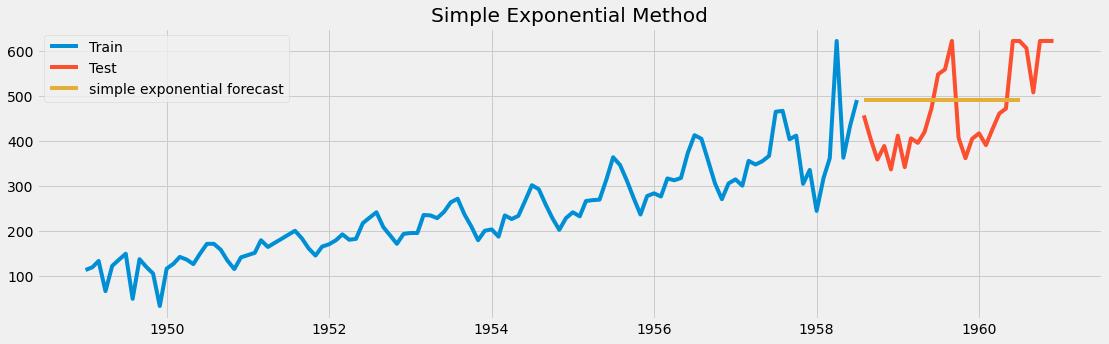

In [54]:
plt.rcParams['figure.figsize'] = (17,5)

plt.plot(train['Customers'], label = 'Train')
plt.plot(test['Customers'], label = 'Test')
plt.plot(y_exp['Exponential_forecast'], label = 'simple exponential forecast')

plt.legend()
plt.title('Simple Exponential Method')
plt.show()

* Last day for alpha = 1

# Holt Exponential Smoothing
Holt’s exponential smoothing captures the level and trend of time series in the forecast.

The forecast equation is a function of both level and trend.

y(t+1) = l(t) +b(t) 

Where l(t) is the level component and b(t) is the trend component.

The trend component is calculated as shown

b(t) = β(l(t) - l(t-1)) + (1-β)b(t-1) 

Here beta is the smoothing parameter for trend.


In [45]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model = ExponentialSmoothing(train['Customers'], seasonal_periods=12, trend='multiplicative')
model_fit = model.fit(smoothing_level=0.2,smoothing_slope=0.04)
model_fit.params
y_holtexponential = test.copy()
y_holtexponential['holtexponential_forecast'] = model_fit.forecast(24)

C:\Users\amirr\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


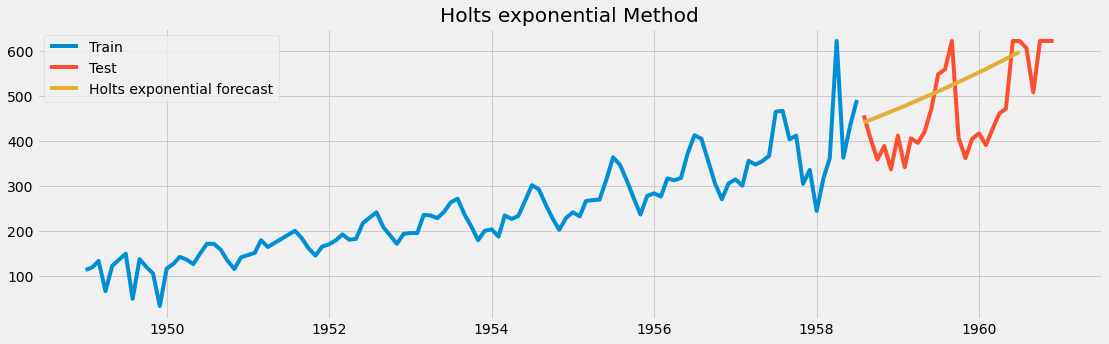

In [46]:
plt.rcParams['figure.figsize'] = (17,5)

plt.plot(train['Customers'], label = 'Train')
plt.plot(test['Customers'], label = 'Test')
plt.plot(y_holtexponential['holtexponential_forecast'], label = 'Holts exponential forecast')

plt.legend()
plt.title('Holts exponential Method')
plt.show()

# Holt Winter Exponential Smoothing
This techniques forecasts based on level, trend and seasonality.
The forecast equation for this method includes seasonality.
	
y(t+1) = l(t)+b(t)+s(t+1-m) 
Here m is the number of time a season repeats in a time period.

In [78]:
model = ExponentialSmoothing(train['Customers'], seasonal_periods=12, trend='multiplicative', seasonal='additive')
model_fit = model.fit(smoothing_level=0.2,smoothing_slope=0.04)
model_fit.params
y_holtwinter = test.copy()
y_holtwinter['holtwinter_forecast'] = model_fit.forecast(12)

C:\Users\amirr\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


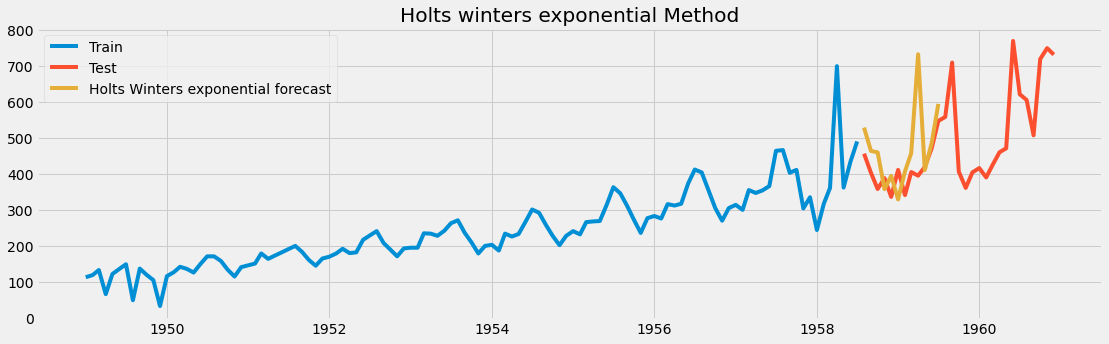

In [27]:
plt.rcParams['figure.figsize'] = (17,5)

plt.plot(train['Customers'], label = 'Train')
plt.plot(test['Customers'], label = 'Test')
plt.plot(y_holtwinter['holtwinter_forecast'], label = 'Holts Winters exponential forecast')

plt.legend()
plt.title('Holts winters exponential Method')
plt.show()

# Stationarity
Stationarity means that the statistical properties of a process generating a time series do not change over time. The statistical properties are Mean, variance and covariance which are same irrespective of the time at which you observe them.

In [55]:
pd.DataFrame(data.Customers.describe())

,Customers
count,144.000000
mean,286.680556
std,136.456487
min,34.000000
25%,180.750000
50%,265.500000
75%,364.750000
max,622.000000


# Augmented Dickey-Fuller (ADF) Test for Stationarity
Augmented Dickey Fuller test (ADF Test) is a common statistical test used to test whether a given Time series is stationary or not. It is one of the most commonly used statistical test when it comes to analyzing the stationary of a series.
* p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
* p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

In [56]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(data['Customers'])
result

(2.7105600112832806,
 0.9990875034273379,
 14,
 129,
 {'1%': -3.482087964046026,
  '5%': -2.8842185101614626,
  '10%': -2.578864381347275},
 1339.8797843138855)

In [57]:
import statsmodels.tsa.stattools as sts
sts.adfuller(data['Customers'])

(2.7105600112832806,
 0.9990875034273379,
 14,
 129,
 {'1%': -3.482087964046026,
  '5%': -2.8842185101614626,
  '10%': -2.578864381347275},
 1339.8797843138855)

In [58]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data['Customers'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print(f'n_lags: {result[2]}')
print("")

for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')  

ADF Statistic: 2.7105600112832806
p-value: 0.9990875034273379
n_lags: 14

Critial Values:
   1%, -3.482087964046026
Critial Values:
   5%, -2.8842185101614626
Critial Values:
   10%, -2.578864381347275


* p-value > 5% >>>>> H0 Accepted (Fails to Reject) >>>>> Series is non-stationary

* The mean value is not stationary.
* The variance is fluctating over time.

In [51]:
import datetime

today = datetime.datetime.today()
print(f"{today:%B %d, %Y}")

October 20, 2021


# Compare with ACF

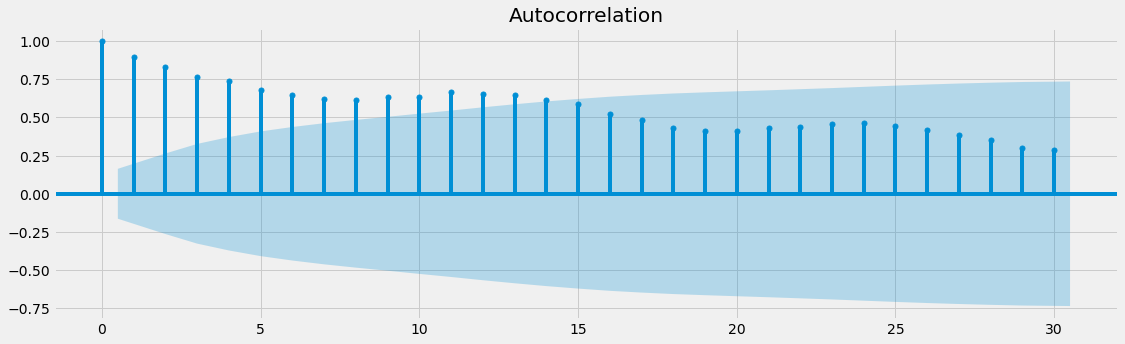

In [60]:
#Loading and plotting acf
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(data['Customers'], ax=plt.gca(), lags=30)
plt.show()

# gca: get current axes

# Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test
The Kwiatkowski–Phillips–Schmidt–Shin (KPSS) test figures out if a time series is stationary around a mean or linear trend, or is non-stationary due to a unit root. A stationary time series is one where statistical properties — like the mean and variance — are constant over time.

For KPSS test,

The Null Hypothesis : The series is stationary when p-value >0.05

Alternate Hypothesis: The series is not stationary when p-value <= 0.05

In [59]:
#loading kpss from statsmodel
from statsmodels.tsa.stattools import kpss

result = kpss(data['Customers'])
print(f'KPSS Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print(f'num lags: {result[2]}')
print("")


for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')  

KPSS Statistic: 1.0654466813105485
p-value: 0.01
num lags: 14

Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


C:\Users\amirr\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1685: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


* p-value < 5% >>>>> H0 Rejected

# Non-Stationary Series to Stationary Series
There are two tools for converting a non-stationary series into a stationary series.

**1) Differencing**

Differencing tool is used to make the mean constant for a time series. That means it removes the trend from the series. 

**2) Transformation**


The procedure is to find the optimal value of lambda between -5 and +5 to minimize the variance of the time series.

## Box Cox Transformation
A Box Cox transformation is a way to transform non-normal dependent variables into a normal shape. Normality is an important assumption for many statistical techniques; if your data isn't normal, applying a Box-Cox means that you are able to run a broader number of tests.

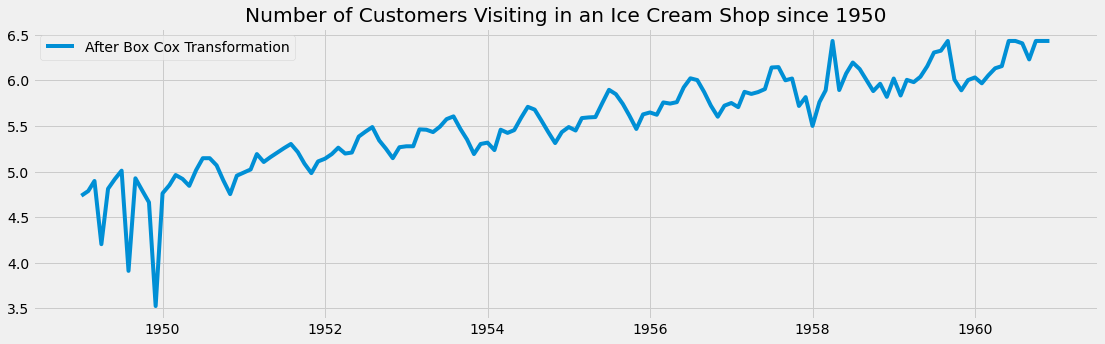

In [61]:
from scipy.stats import boxcox

data_boxcox = pd.Series(boxcox(data['Customers'],lmbda=0),index=data.index)
plt.plot(data_boxcox, label="After Box Cox Transformation")
plt.legend()
plt.title("Number of Customers Visiting in an Ice Cream Shop since 1950")
plt.show()

In [65]:
from scipy import stats
fitted_data, fitted_lambda = stats.boxcox(data['Customers'])

# print(fitted_data)
print(fitted_lambda)

0.34710326372847605


In [63]:
xx  = stats.boxcox(data['Customers'])
xx[1]

0.34710326372847605

### Quick Example

Lambda value used for Transformation: 0.26334728099496574


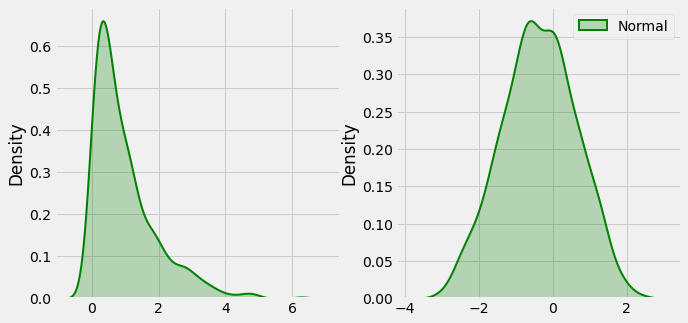

In [66]:
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

# generate non-normal data (exponential)
original_data = np.random.exponential(size = 1000)

# transform training data & save lambda value
fitted_data, fitted_lambda = stats.boxcox(original_data)

# creating axes to draw plots
fig, ax = plt.subplots(1, 2)

# plotting the original data(non-normal) and fitted data (normal)
sns.distplot(original_data, hist = False, kde = True,kde_kws = {'shade': True, 'linewidth': 2},
             label = "Non-Normal", color ="green", ax = ax[0])

sns.distplot(fitted_data, hist = False, kde = True,kde_kws = {'shade': True, 'linewidth': 2},
             label = "Normal", color ="green", ax = ax[1])

plt.legend(loc = "upper right")

# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(10)

print(f"Lambda value used for Transformation: {fitted_lambda}")

## Differencing

Differencing stabilises the mean of a time series by removing changes in the level of a time series, and therefore eliminating (or reducing) trend and seasonality. 

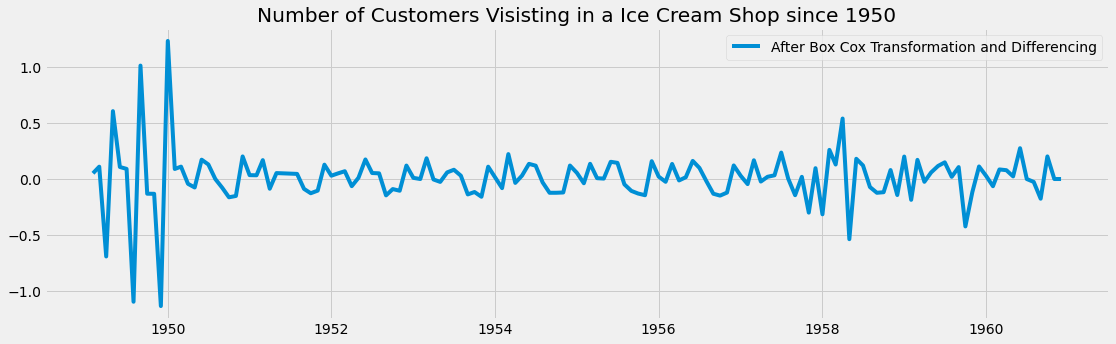

In [67]:
data_boxcox_difference= pd.Series(data_boxcox - data_boxcox.shift(), index=data.index)
data_boxcox_difference.dropna(inplace=True)

plt.plot(data_boxcox_difference, label="After Box Cox Transformation and Differencing")
plt.legend()
plt.title("Number of Customers Visisting in a Ice Cream Shop since 1950")
plt.show()

## ADF Test

Checking stationary after transformation

In [69]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data_boxcox_difference)
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]:.20f}')
print(f'p-value: {result[1]:.20f}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -11.770270241136178
n_lags: 0.00000000000000000000
p-value: 0.00000000000000000000
Critial Values:
   1%, -3.4808880719210005
Critial Values:
   5%, -2.8836966192225284
Critial Values:
   10%, -2.5785857598714417


## Auto Correleation Function (ACF)
ACF is an (complete) auto-correlation function which gives us values of auto-correlation of any series with its lagged values. 

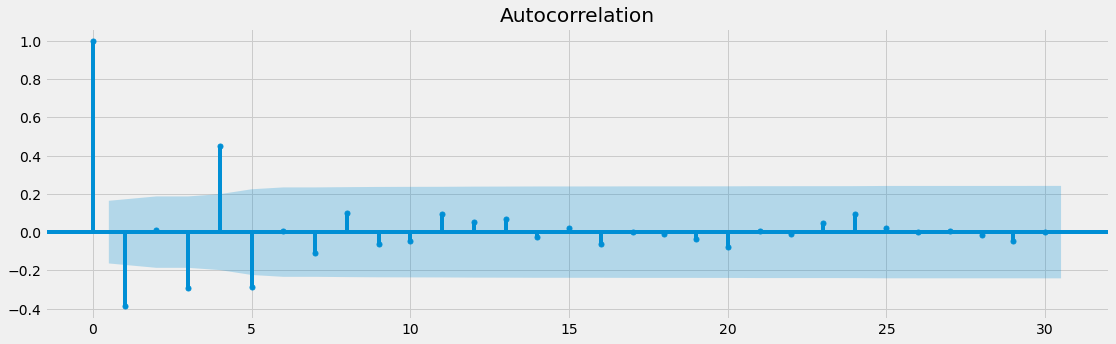

In [77]:
#Loading and plotting acf
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(data_boxcox_difference, ax=plt.gca(), lags=30)
plt.show()

# gca: get current axes

1,3,4,5th have significant correlation with future observations.

Model equation would be:

* y = β0 + β1*y(t-1) + β2*y(t-3) + β3*y(t-4) + β4*y(t-5)

* y(t-1), y(t-3), y(t-4) and y(t-5) are the independent variables.


## Partial Auto Correleation Function (PACF)
Partial autocorrelation function (PACF) gives the partial correlation of a stationary time series with its own lagged values, regressed the values of the time series at all shorter lags. It contrasts with the autocorrelation function, which does not control for other lags.

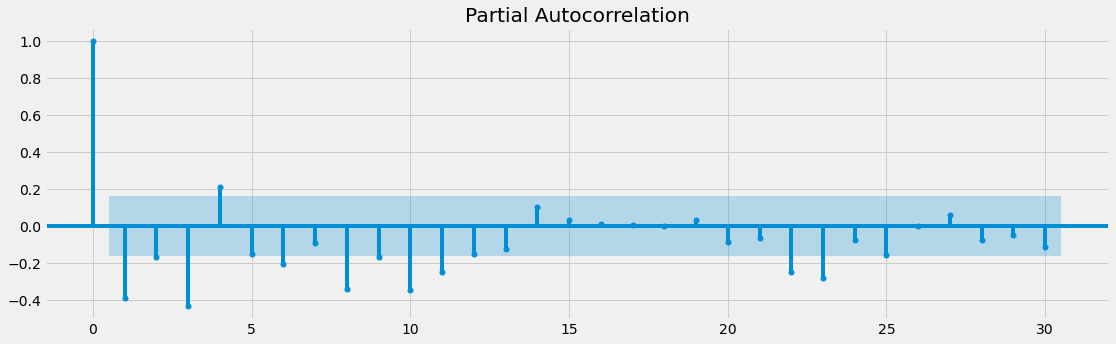

In [71]:
#Loading and plottin pacf
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data_boxcox_difference, ax=plt.gca(), lags=30)
plt.show()

In [72]:
length_train = 115

train_data_boxcox = data_boxcox[:length_train]
test_data_boxcox = data_boxcox[length_train:]

# for NA
train_data_boxcox_difference = data_boxcox_difference[:length_train-1]
test_data_boxcox_difference = data_boxcox_difference[length_train-1:]

# Auto Regressive Model
Regressive model is forecasting the future observations as a **linear regression** of one or more past observations.

* This model has a parameter called “p” which is the lag order

*  is the maximum number of lags that we consider in order to forecast the future observations.

Autoregressive model equation would be


* y(t) = β0 + β1*y(t-1) + β2*y(t-3) + β3*y(t-4) + β4*y(t-5)


In [73]:
from statsmodels.tsa.arima_model import ARIMA

model_ar = ARIMA(train_data_boxcox_difference, order=(1,0,0))
model_fit = model_ar.fit()
print(model_fit.params)

const      0.012440
ar.L1.y   -0.398536
dtype: float64


C:\Users\amirr\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


* Lag = 4 and Regression on 4 Features (Samples)!

## Transform to Original Time Series Data

In [78]:
y_ar_new = data_boxcox_difference.copy()
y_ar_new

Date
1949-02-01    0.051293
1949-03-01    0.110348
1949-04-01   -0.693147
1949-05-01    0.607492
1949-06-01    0.107797
                ...   
1960-08-01   -0.026060
1960-09-01   -0.176399
1960-10-01    0.202459
1960-11-01    0.000000
1960-12-01    0.000000
Length: 143, dtype: float64

In [79]:
y_ar_new['ar_forecast_boxcox_difference'] = model_fit.predict(data_boxcox_difference.index.min(),
                                                              data_boxcox_difference.index.max())

y_ar_new['ar_forecast_boxcox'] = y_ar_new['ar_forecast_boxcox_difference'].cumsum()
y_ar_new['ar_forecast_boxcox'] = y_ar_new['ar_forecast_boxcox'].add(data_boxcox[0]) #add data
y_ar_new['ar_forecast'] = np.exp(y_ar_new['ar_forecast_boxcox']) #transform

## Forecasting

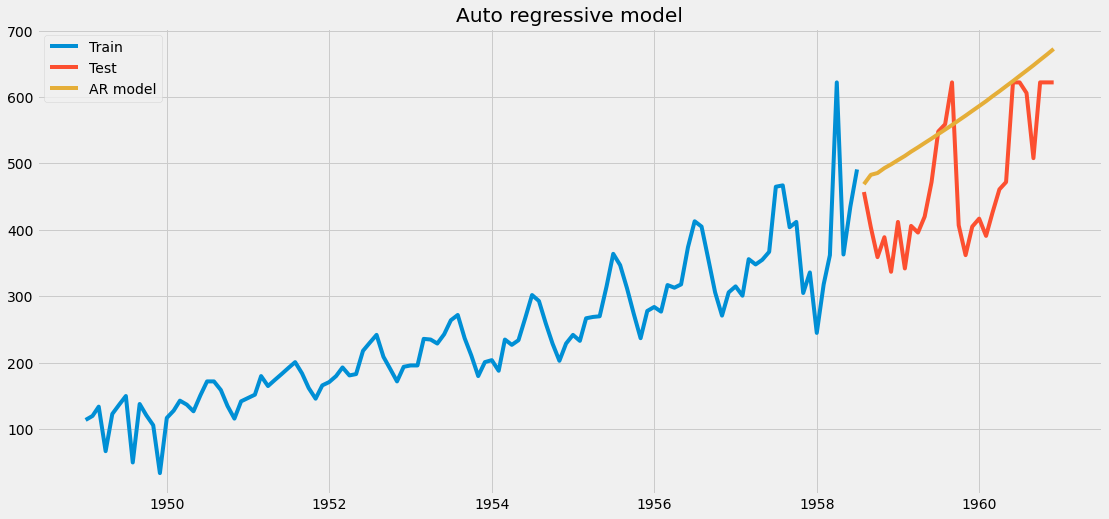

In [80]:
plt.figure(figsize=(17,8))

plt.plot(train['Customers_linear'], label = 'Train')
plt.plot(test['Customers_linear'], label = 'Test')
plt.plot(y_ar_new['ar_forecast'][test.index.min():], label = 'AR model')

plt.legend()
plt.title('Auto regressive model')
plt.show()

* only Trend Detected (Not Seasonal!)

# Moving Average Method
In Moving Average Model, we consider the past forecasted errors to forecast the future values.

The moving average model has a parameter called “q” which is the size of the moving average window over which linear combinations of errors are calculated.

The mathematical equation is:-

y(t) = µ + φ(k)*ε(t-k)

µ is the mean of the series

ε(t-k) is the past forecasted value

φ(k) is the weight associated with error value


In [81]:
#from statsmodels.tsa.arima_model import ARIMA

model_ma = ARIMA(train_data_boxcox_difference, order=(0,0,7))
model_fit = model_ma.fit()
print(model_fit.params)

C:\Users\amirr\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


const      0.012553
ma.L1.y   -0.539879
ma.L2.y   -0.200035
ma.L3.y   -0.146816
ma.L4.y    0.627896
ma.L5.y   -0.310058
ma.L6.y   -0.113329
ma.L7.y   -0.317780
dtype: float64


In [95]:
data_boxcox

Date
1949-01-01    4.736198
1949-02-01    4.787492
1949-03-01    4.897840
1949-04-01    4.204693
1949-05-01    4.812184
                ...   
1960-08-01    6.406880
1960-09-01    6.230481
1960-10-01    6.432940
1960-11-01    6.432940
1960-12-01    6.432940
Length: 144, dtype: float64

## Transform to Original Time Series Data

In [82]:
y_ma_new = data_boxcox_difference.copy()
y_ma_new['ma_forecast_boxcox_difference'] = model_fit.predict(data_boxcox_difference.index.min(),
                                                              data_boxcox_difference.index.max())

y_ma_new['ma_forecast_boxcox'] = y_ma_new['ma_forecast_boxcox_difference'].cumsum()
y_ma_new['ma_forecast_boxcox'] = y_ma_new['ma_forecast_boxcox'].add(data_boxcox[0])
y_ma_new['ma_forecast'] = np.exp(y_ma_new['ma_forecast_boxcox'])

## ForeCasting

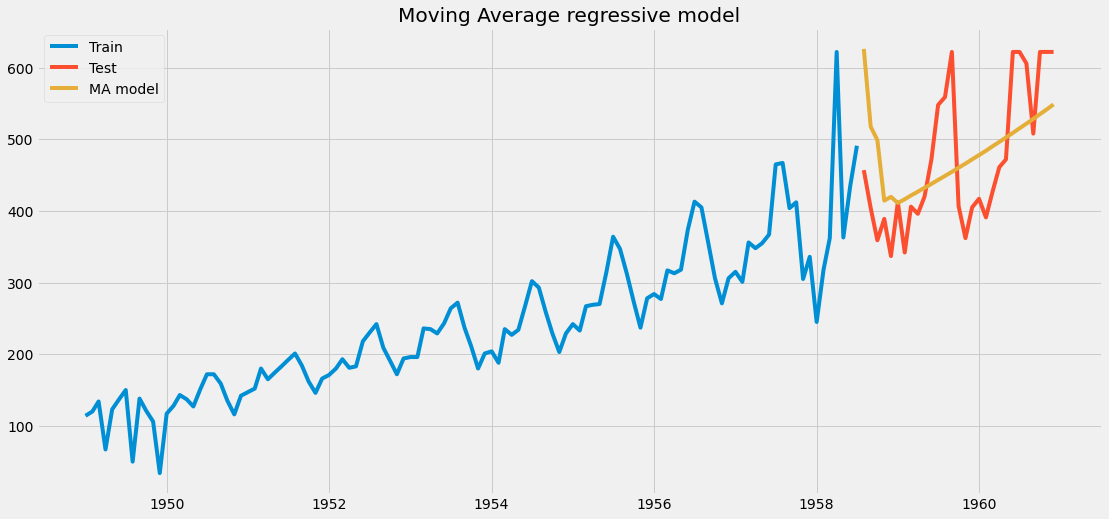

In [83]:
plt.figure(figsize=(17,8))

plt.plot(train['Customers_linear'], label = 'Train')
plt.plot(test['Customers_linear'], label = 'Test')
plt.plot(y_ma_new['ma_forecast'][test.index.min():], label = 'MA model')

plt.legend()
plt.title('Moving Average regressive model')
plt.show()

# Auto Regressive Moving Average Model (ARMA)
ARMA Model combines both AR and MA model.

It takes into account one or more past observations as well as the past errors.

The ARMA model contains two parameters p and q

p is the highest lag in the time series

q is the number of past errors included
  

In [84]:
from statsmodels.tsa.arima_model import ARIMA

model_arma = ARIMA(train_data_boxcox_difference, order=(1,0,5))
model_fit = model_arma.fit()
print(model_fit.params)

C:\Users\amirr\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


const      0.012067
ar.L1.y   -0.401650
ma.L1.y   -0.207803
ma.L2.y   -0.514185
ma.L3.y   -0.307993
ma.L4.y    0.314265
ma.L5.y   -0.284283
dtype: float64


In [85]:
y_arma_new = data_boxcox_difference.copy()
y_arma_new['arma_forecast_boxcox_difference'] = model_fit.predict(data_boxcox_difference.index.min(),
                                                                  data_boxcox_difference.index.max())
y_arma_new['arma_forecast_boxcox'] = y_arma_new['arma_forecast_boxcox_difference'].cumsum()
y_arma_new['arma_forecast_boxcox'] = y_arma_new['arma_forecast_boxcox'].add(data_boxcox[0])
y_arma_new['arma_forecast'] = np.exp(y_arma_new['arma_forecast_boxcox'])

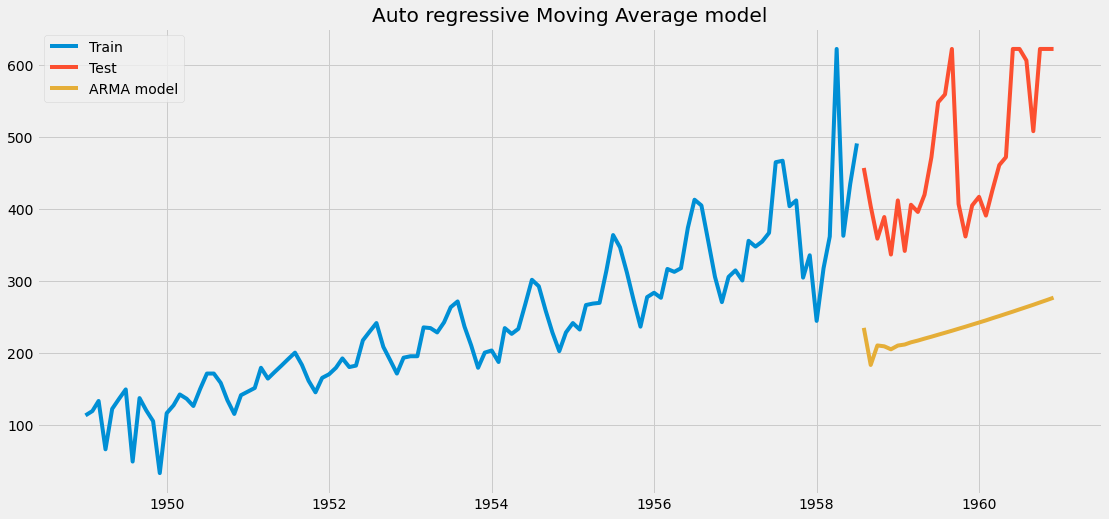

In [86]:
plt.figure(figsize=(17,8))

plt.plot(train['Customers_linear'], label = 'Train')
plt.plot(test['Customers_linear'], label = 'Test')
plt.plot(y_arma_new['arma_forecast'][test.index.min():], label = 'ARMA model')

plt.legend()
plt.title('Auto regressive Moving Average model')
plt.show()

# Auto Regressive Integrated Moving Average Model (ARIMA)

It transform the time series using Box Cox and then itself takes care of the differencing and remove the trend from the time series.

We have three parameters to be used:-

p is the highest lag in the model

d is the degree of differencing to make the series stationary

q is the number of past errors terms included

In [89]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(train_data_boxcox, order=(1,1,5))
model_fit = model.fit()
print(model_fit.params)

C:\Users\amirr\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\amirr\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


const        0.012067
ar.L1.D.y   -0.401650
ma.L1.D.y   -0.207803
ma.L2.D.y   -0.514185
ma.L3.D.y   -0.307993
ma.L4.D.y    0.314265
ma.L5.D.y   -0.284283
dtype: float64


In [90]:
y_arima_new = data_boxcox_difference.copy()
y_arima_new['arima_forecast_boxcox_difference'] = model_fit.predict(data_boxcox_difference.index.min(),
                                                                    data_boxcox_difference.index.max())
y_arima_new['arima_forecast_boxcox'] = y_arima_new['arima_forecast_boxcox_difference'].cumsum()
y_arima_new['arima_forecast_boxcox'] = y_arima_new['arima_forecast_boxcox'].add(data_boxcox[0])
y_arima_new['arima_forecast'] = np.exp(y_arima_new['arima_forecast_boxcox'])

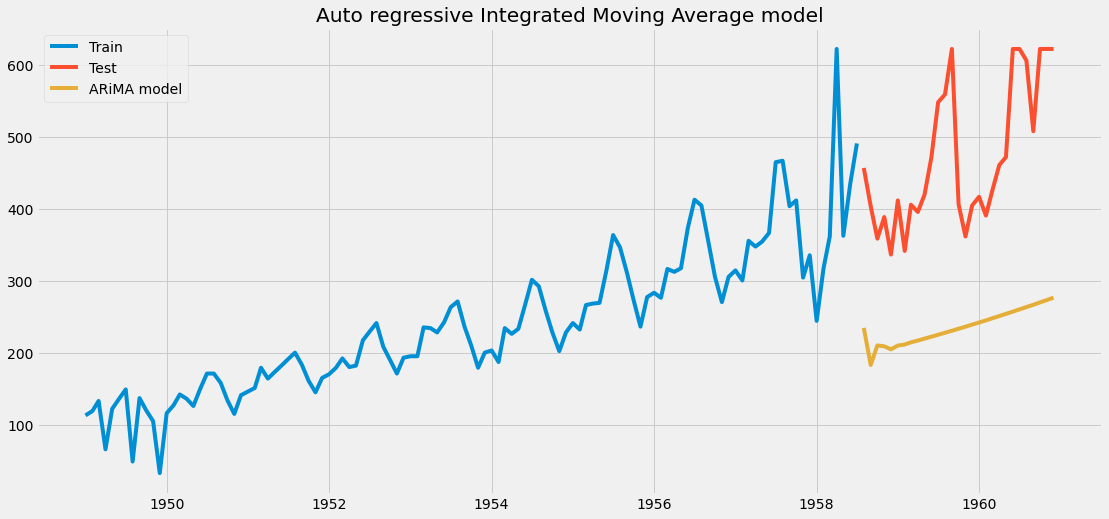

In [91]:
plt.figure(figsize=(17,8))

plt.plot(train['Customers_linear'], label = 'Train')
plt.plot(test['Customers_linear'], label = 'Test')
plt.plot(y_arima_new['arima_forecast'][test.index.min():], label = 'ARiMA model')

plt.legend()
plt.title('Auto regressive Integrated Moving Average model')
plt.show()

# Seasonal Auto Regressive Integrated Moving Average Model (SARIMA)

SARIMA model brings all the features of ARIMA model along with the seasonality.

The key elements performed in SARIMA are:-

1. The time series is differenced to make it stationary.

2. The SARIMA equation is a linear combination of past observations and past errors.

3. Seasonal differencing is performed on the time series.

4. SARIMA models future seasonality as a linear combination of past seasonality observations and past seasonality errors.


In [92]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train_data_boxcox_difference, order=(1,1,1), seasonal_order=(1,1,1,6))
model_fit = model.fit()
print(model_fit.params)

C:\Users\amirr\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\amirr\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ar.L1     -0.577778
ma.L1     -0.998157
ar.S.L6   -0.734402
ma.S.L6   -0.539980
sigma2     0.049825
dtype: float64


In [93]:
y_sarima_new = data_boxcox_difference.copy()
y_sarima_new['sarima_forecast_boxcox_difference'] = model_fit.predict(data_boxcox_difference.index.min(),
                                                                      data_boxcox_difference.index.max())
y_sarima_new['sarima_forecast_boxcox'] = y_sarima_new['sarima_forecast_boxcox_difference'].cumsum()
y_sarima_new['sarima_forecast_boxcox'] = y_sarima_new['sarima_forecast_boxcox'].add(data_boxcox[0])
y_sarima_new['sarima_forecast'] = np.exp(y_sarima_new['sarima_forecast_boxcox'])

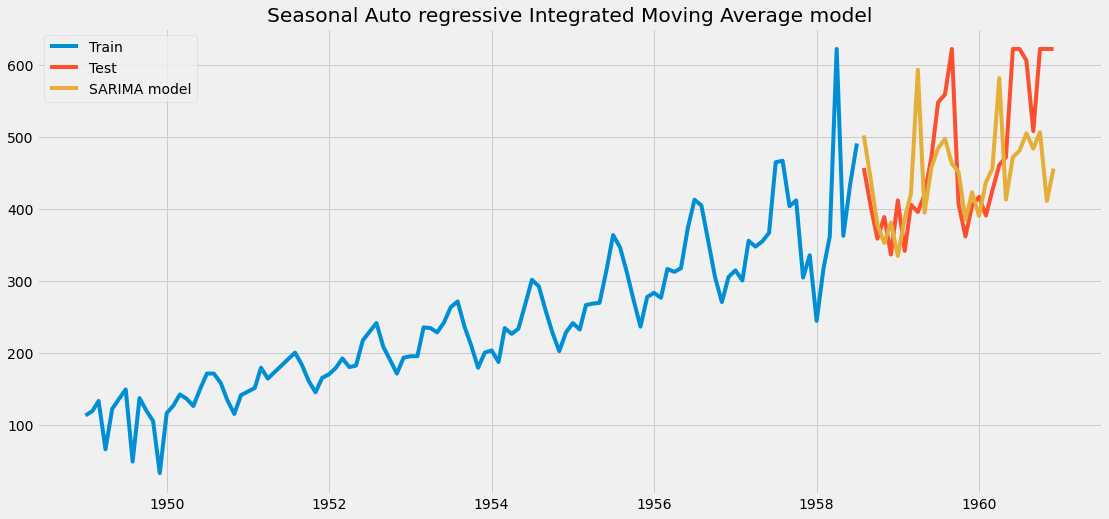

In [94]:
plt.figure(figsize=(17,8))

plt.plot(train['Customers_linear'], label = 'Train')
plt.plot(test['Customers_linear'], label = 'Test')
plt.plot(y_sarima_new['sarima_forecast'][test.index.min():], label = 'SARIMA model')

plt.legend()
plt.title('Seasonal Auto regressive Integrated Moving Average model')
plt.show()